In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import quad
from scipy.stats import norm
import os

In [2]:
os.getcwd()

'/Users/wumingheng/Desktop'

In [3]:
os.chdir('/Users/wumingheng/Desktop/parameters')

In [4]:
zero_rf = pd.read_csv('zero_rates_20201201.csv')

In [5]:
zero_rf

,date,days,rate
0,20201201,7,0.102280
1,20201201,13,0.114128
2,20201201,49,0.216480
3,20201201,77,0.220707
4,20201201,104,0.219996
5,20201201,139,0.218208
6,20201201,167,0.216468
7,20201201,195,0.215228
8,20201201,286,0.212862
9,20201201,377,0.214085


In [6]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Days')

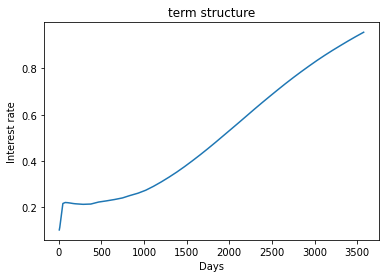

In [55]:
plt.plot(zero_rf['days'],zero_rf['rate'])
plt.title('term structure')
plt.ylabel('Interest rate')
plt.xlabel('Days')

In [8]:
sabr_para_SPX = pd.read_csv('sabr_para_SPX.csv')
rf_SPX = pd.read_csv('rf_SPX.csv')
vol_SPX = pd.read_csv('vol_SPX.csv')
sabr_para_SPY = pd.read_csv('sabr_para_SPY.csv')
rf_SPY = pd.read_csv('rf_SPY.csv')
vol_SPY = pd.read_csv('vol_SPY.csv')

In [9]:
SPY_options = pd.read_csv('SPY_options.csv')

In [10]:
SPX_options = pd.read_csv('SPX_options.csv')

In [11]:
sabr_para_SPX.drop(columns = {'Unnamed: 0'},inplace = True)

In [12]:
sabr_para_SPX

,alpha,beta,rho,nu
0,1.212290,0.7,-0.300900,5.459761
1,1.816504,0.7,-0.404302,2.790158
2,2.140133,0.7,-0.574934,1.841747


In [13]:
rf_SPX.drop(columns = {'Unnamed: 0'},inplace = True)

In [14]:
rf_SPX

,rf,T
0,0.001255,17
1,0.002051,45
2,0.002206,80


In [15]:
vol_SPX.drop(columns = {'Unnamed: 0'},inplace = True)

In [16]:
vol_SPX = vol_SPX.pivot_table(columns = {'implied_vol'})

In [17]:
vol_SPX = vol_SPX.reset_index().drop(columns = {'index'})

In [18]:
sabr_para_SPY.drop(columns = {'Unnamed: 0'},inplace = True)

In [19]:
sabr_para_SPY

,alpha,beta,rho,nu
0,0.665402,0.7,-0.411900,5.249981
1,0.908133,0.7,-0.488779,2.728516
2,1.120924,0.7,-0.632939,1.742225


In [20]:
SPX_data = pd.concat([rf_SPX,sabr_para_SPX,vol_SPX],axis = 1)

In [21]:
SPX_data# get all parameters of SPX options

,rf,T,alpha,beta,rho,nu,implied_vol
0,0.001255,17,1.212290,0.7,-0.300900,5.459761,0.175099
1,0.002051,45,1.816504,0.7,-0.404302,2.790158,0.185372
2,0.002206,80,2.140133,0.7,-0.574934,1.841747,0.190973


In [22]:
rf_SPY.drop(columns = {'Unnamed: 0'},inplace = True)

In [23]:
rf_SPY

,rf,T
0,0.001255,17
1,0.002051,45
2,0.002206,80


In [24]:
vol_SPY.drop(columns = {'Unnamed: 0'},inplace = True)

In [25]:
vol_SPY = vol_SPY.reset_index().pivot_table(columns = {'implied_vol'})

In [26]:
vol_SPY = vol_SPY.reset_index()

In [27]:
SPY_data = pd.concat([rf_SPY,sabr_para_SPY,vol_SPY['implied_vol']],axis = 1)

In [29]:
def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)


def BlackScholesPut(S, K, r, sigma, T):
    return BlackScholesCall(S, K, r, sigma, T) - S + K*np.exp(-r*T)


def BSM_callintegrand(K, S, r, T, sigma):
    price = BlackScholesCall(S, K, r, sigma, T)/K**2
    return price


def BSM_putintegrand(K, S, r, T, sigma):
    price = BlackScholesPut(S, K, r, sigma, T)/K**2
    return price

In [30]:
spx_St = 3662.45 #price of underlying asset SPX

In [31]:
hf = spx_St**(1/3)+1.5*np.log(spx_St)+10

In [32]:
F = spx_St*np.exp(SPX_data['rf']*SPX_data['T']/365)

In [33]:
F

0    3662.664085
1    3663.376249
2    3664.221473
dtype: float64

In [34]:
r = SPX_data['rf'][1]
T = SPX_data['T'][1]/365
sigma = SPX_data['implied_vol'][1]

In [35]:
I_put_BSM = quad(lambda x: ((-2/9)*x**(-5/3)-1.5/x**2)*BSM_putintegrand(x, spx_St, r, T, sigma), 0.0, F[1])
I_call_BSM = quad(lambda x: ((-2/9)*x**(-5/3)-1.5/x**2)*BSM_callintegrand(x, spx_St, r, T, sigma), F[1], 5000)
E_var_BSM = 2*np.exp(r*T)*(I_put_BSM[0] + I_call_BSM[0])

In [36]:
print('the expected variance is',E_var_BSM)

the expected variance is -1.5630615629653835e-09


In [37]:
price_BSM = np.exp(-r*T)*hf+I_put_BSM[0] + I_call_BSM[0]
print('the price of SPX option(at the money) based on Balck-Scholes Model is', price_BSM)

the price of SPX option(at the money) based on Balck-Scholes Model is 37.713596817153615


# Price of BachelierVanillaCall(SPX)

In [38]:
def BachelierVanillaCall(S, K, r, sigma, T):
    d3 = (S-K) / (sigma*np.sqrt(T))
    return np.exp(-r * T) * ((S-K)*norm.cdf(d3) + sigma*np.sqrt(T)*norm.pdf(d3))

def BachelierVanillaPut(S,K,r,sigma,T):
    d3 = (S-K) / (sigma*np.sqrt(T))
    return np.exp(-r * T) * ((K-S)*norm.cdf(-d3) + sigma*np.sqrt(T)*norm.pdf(d3))


def Bachelier_callintegrand(K, S, r, sigma, T):
    price = ((-2/9)*K**(-5/3)-1.5/K**2)*BachelierVanillaCall(S, K, r, sigma, T)
    return price

def Bachelier_callintegrand(K, S, r, sigma, T):
    price = ((-2/9)*K**(-5/3)-1.5/K**2)*BachelierVanillaPut(S, K, r, sigma, T)
    return price

In [39]:
I_put_Bc = quad(lambda x: ((1/3)*x**(-2/3)+1.5/x)*Bachelier_callintegrand(x, spx_St, r, T, sigma), 0.0, F[1])
I_call_Bc = quad(lambda x: ((1/3)*x**(-2/3)+1.5/x)*Bachelier_callintegrand(x, spx_St, r, T, sigma), F[1], 5000)
E_var_Bc = 2*np.exp(r*T)*(I_put_Bc[0] + I_call_Bc[0])

In [40]:
price_Bc = np.exp(-r*T)*hf+I_put_BSM[0] + I_call_BSM[0]
print('the price of SPX option(at the money) based on Balck-Scholes Model is', price_Bc)

the price of SPX option(at the money) based on Balck-Scholes Model is 37.713596817153615


# Price of SABR Model(SPX)

In [41]:
def SABR(F, K, T, alpha, beta, rho, nu):
    X = K
    # if K is at-the-money-forward
    if abs(F - K) < 1e-12:
        numer1 = (((1 - beta)**2)/24)*alpha*alpha/(F**(2 - 2*beta))
        numer2 = 0.25*rho*beta*nu*alpha/(F**(1 - beta))
        numer3 = ((2 - 3*rho*rho)/24)*nu*nu
        VolAtm = alpha*(1 + (numer1 + numer2 + numer3)*T)/(F**(1-beta))
        sabrsigma = VolAtm
    else:
        z = (nu/alpha)*((F*X)**(0.5*(1-beta)))*np.log(F/X)
        zhi = np.log((((1 - 2*rho*z + z*z)**0.5) + z - rho)/(1 - rho))
        numer1 = (((1 - beta)**2)/24)*((alpha*alpha)/((F*X)**(1 - beta)))
        numer2 = 0.25*rho*beta*nu*alpha/((F*X)**((1 - beta)/2))
        numer3 = ((2 - 3*rho*rho)/24)*nu*nu
        numer = alpha*(1 + (numer1 + numer2 + numer3)*T)*z
        denom1 = ((1 - beta)**2/24)*(np.log(F/X))**2
        denom2 = (((1 - beta)**4)/1920)*((np.log(F/X))**4)
        denom = ((F*X)**((1 - beta)/2))*(1 + denom1 + denom2)*zhi
        sabrsigma = numer/denom

    return sabrsigma


In [42]:
def SABRCall(S, K, r, alpha, beta, rho, nu, T):
    sabr_vol = SABR(S*np.exp(r*T), K, T, alpha, beta, rho, nu)
    return BlackScholesCall(S, K, r, sabr_vol, T)


def SABRPut(S, K, r, alpha, beta, rho, nu, T):
    sabr_vol = SABR(S*np.exp(r*T), K, T, alpha, beta, rho, nu)
    return BlackScholesPut(S, K, r, sabr_vol, T)


def sabrcallintegrand(K, S, r, T, alpha, beta, rho, nu):
    price = SABRCall(S, K, r, alpha, beta, rho, nu, T) / K**2
    return price


def sabrputintegrand(K, S, r, T, alpha, beta, rho, nu):
    price = SABRPut(S, K, r, alpha, beta, rho, nu, T) / K**2
    return price

In [43]:
alpha = SPX_data['alpha'][1]
beta = SPX_data['beta'][1]
rho = SPX_data['rho'][1]
nu = SPX_data['nu'][1]

In [44]:
I_put_sabr = quad(lambda x: ((1/3)*x**(-2/3)+1.5/x)*sabrputintegrand(x, spx_St, r, T, alpha, beta, rho, nu), 1e-6, F[1])
I_call_sabr = quad(lambda x: ((1/3)*x**(-2/3)+1.5/x)*sabrcallintegrand(x, spx_St, r, T, alpha, beta, rho, nu), F[1], 5000)
E_var_sabr = 2*np.exp(r*T)*(I_put_sabr[0] + I_call_sabr[0])

<ipython-input-44-65618f82f412>:1: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I_put_sabr = quad(lambda x: ((1/3)*x**(-2/3)+1.5/x)*sabrputintegrand(x, spx_St, r, T, alpha, beta, rho, nu), 1e-6, F[1])


In [45]:
price_sabr = np.exp(-r*T)*hf+I_put_BSM[0] + I_call_BSM[0]
print(price_sabr)

37.713596817153615


# SPY

In [46]:
spy_St = 366.02 #price of underlying asset SPX
hfy = spy_St**(1/3)+1.5*np.log(spy_St)+10
Fy = spy_St*np.exp(SPY_data['rf']*SPY_data['T']/365)

In [47]:
Fy

0    366.041395
1    366.112568
2    366.197038
3           NaN
dtype: float64

In [48]:
ry = SPY_data['rf'][1]
Ty = SPY_data['T'][1]/365
sigmay = SPY_data['implied_vol'][1]

In [49]:
I_put_BSM_y = quad(lambda x: ((-2/9)*x**(-5/3)-1.5/x**2)*BSM_putintegrand(x, spy_St, ry, Ty, sigmay), 0.0, Fy[1])
I_call_BSM_y = quad(lambda x: ((-2/9)*x**(-5/3)-1.5/x**2)*BSM_callintegrand(x, spy_St, ry, Ty, sigmay), Fy[1], 5000)
E_var_BSM_y = 2*np.exp(r*T)*(I_put_BSM_y[0] + I_call_BSM_y[0])

In [50]:
price_BSM_y = np.exp(-r*T)*hfy+I_put_BSM_y[0] + I_call_BSM_y[0]
print('the price of SPY option(at the money) based on Balck-Scholes Model is', price_BSM_y)

the price of SPY option(at the money) based on Balck-Scholes Model is 26.00067661941665


In [51]:
I_put_Bc_y = quad(lambda x: ((1/3)*x**(-2/3)+1.5/x)*Bachelier_callintegrand(x, spy_St, ry, Ty, sigmay), 0.0, Fy[1])
I_call_Bc_y = quad(lambda x: ((1/3)*x**(-2/3)+1.5/x)*Bachelier_callintegrand(x, spy_St, ry, Ty, sigmay), Fy[1], 5000)
E_var_Bc_y = 2*np.exp(r*T)*(I_put_Bc_y[0] + I_call_Bc_y[0])

In [52]:
price_Bc_y = np.exp(-r*T)*hfy+I_put_Bc_y[0] + I_call_Bc_y[0]
print('the price of SPY option(at the money) based on Balck-Scholes Model is', price_Bc_y)

the price of SPY option(at the money) based on Balck-Scholes Model is 25.97699613342313


In [53]:
I_put_sabr_y = quad(lambda x: ((1/3)*x**(-2/3)+1.5/x)*sabrputintegrand(x, spy_St, ry, Ty, alpha, beta, rho, nu), 1e-6, F[1])
I_call_sabr_y = quad(lambda x: ((1/3)*x**(-2/3)+1.5/x)*sabrcallintegrand(x, spy_St, ry, Ty, alpha, beta, rho, nu), F[1], 5000)
E_var_sabr_y = 2*np.exp(r*T)*(I_put_sabr_y[0] + I_call_sabr_y[0])

<ipython-input-53-dd02b05386cd>:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_put_sabr_y = quad(lambda x: ((1/3)*x**(-2/3)+1.5/x)*sabrputintegrand(x, spy_St, ry, Ty, alpha, beta, rho, nu), 1e-6, F[1])


In [54]:
price_sabr_y = np.exp(-r*T)*hfy+I_put_BSM_y[0] + I_call_BSM_y[0]
print('the price of SPY option(at the money) based on Balck-Scholes Model is',price_sabr_y)

the price of SPY option(at the money) based on Balck-Scholes Model is 26.00067661941665
